# Examining Police Activity in San Diego from 2014 - 2016

### 0) Abstract / tl;dr
This study attempts to examine police activity, specifically traffic citations, across San Diego from 2014 - 2016. Data was obtained from the Stanford Open Policing Project (https://openpolicing.stanford.edu/), an attempt to create a comprehensive repository of police data across the US.

Police traffic stop data was collated across 2014-2016 into a CSV file and examined via Python. Data ranged from the date of the stop, duration of the stop, the reason, whether or not a citation was issued, driver age, driver gender, and driver race. 

For the purposes of this (very informal) study, data was limited to the city of San Diego and the following parameters: stop date, driver gender, driver race, and whether or not a citation was issued.

The following questions were posited: 
i) if there was a particular reason drivers were stopped, 
ii) if citation rate changed throughout the years, 
iii) if one gender got stopped more than another, and 
iv) if there was a race that got stopped more than others.

After extraction, cleaning, analysis, and visualization, the data yielded several findings for the observed period from 2014 - 2016. Firstly, drivers were overwhelmingly likely to be stopped for moving violations. Secondly, with the exception of Christmas, citation rates did not change much throughout the year. Thirdly, male drivers were more likely to get pulled over. Lastly, white San Diegan drivers were pulled over the most. 

It is important to note that this descriptive analysis only demonstrates correlation and does not suggest causation. It could very well be that San Diego has a higher population of white male drivers and thus, these individuals have a higher chance of getting pulled over. Alternatively, it could be that Christmas citations rates were lower due to staff shortages and not necessarily due to any leniency on the officer's behalf. With that said, however, it can be taken with a grain of salt, that the best way to avoid a disruption from a traffic officer would be to avoid moving violations. 

Further insights across counties and states could yield insights as to whether or not county differences or state differences exist.

## 1) Introduction

Police officers make over 50,000 traffic stops per day across the US. Historically, there has been tension between the police and the general population, culminating in social movements (e.g. Black Lives Matter) usually revolving around the topic(s) of race and power. In light of this, and a recent traffic violation, this study aims to address the following questions:

#### i)	Is there a particular reason people are stopped?
**H0: There is no particular reason stops occur.** If this is the case, then we'd expect stop counts to be evenly distributed across all reasons
<br> **HA: There is a particular reason stops occur. ** If this is the case, then we'd expect stop counts to be evenly distributed across all reasons

#### ii)	If so, is there a temporal pattern to whether or not you'd get a citation?
**H0: There is no pattern.** If this is the case, then we'd expect stops to remain consistent throughout the year.
<br> **HA: There is a particular reason stops occur. ** If this is the case, then we'd expect stop counts to follow a cyclical pattern (e.g. seasonaly, monthly, yearly).

#### iii)	Does a gender get stopped more than others?
**H0: There is no gender that gets stopped more than others** If this is the case, then we'd expect stop counts to be evenly distributed across both genders.
<br> **HA: There is a gender that gets stopped more than others. ** If this is the case, then we'd expect stop counts for one gender to be significantly different than the other.

#### iv)	Does a particular race get stopped more than others?
**H0: There is no race that gets stopped more than others** If this is the case, then we'd expect stop counts to be evenly distributed across all races.
<br> **HA: There is one or more race that gets stopped more than others. ** If this is the case, then we'd expect stop counts to be evenly distributed across all races.

## 2) Methods and Overview of Data

Data was obtained from the **Stanford Open Policing Project** (https://openpolicing.stanford.edu/), henceforth referred to as SOPP, an open-source database that seeks to compile and analyze police data across the US. As robust as the current data set is, at the time of this writing (08/2022), the current comprehensiveness and scope are incomplete, thus varying greatly between cities and state. 

Within the SOPP, there is an attempt to organize data in various formats (e.g. csv, r, shape) across states and cities. Furthermore, according to the SOPP data is compiled across 18 parameters as available: 
<br> **i) State**
<br> **ii) File format**
<br> **iii) Total stop count**
<br> **iv) Time range**
<br> **v) Stop date**
<br> vi) Stop time (duration of the stop)
<br> vii) Stop location
<br> **viii) Driver race**
<br> **ix) Driver sex**
<br> x) Driver age
<br> xi) Whether or not a search was conducted
<br> xii) Contrabound found if any
<br> xiii) Whether or not a citation was issued
<br> xiv) Whether or not a warning was issued
<br> xv) If a frisk was performed
<br> xvi) If an arrest was made
<br> **xvii) The reason for the stop, and**
<br> **xviii) The violation given if any.**

The San Diego dataset was chosen due to the relative comprehensiveness of the data, and because of its personal connection to the author. Notably, the San Diego dataset has data across all columns except for columns XV and XVIII (if a frisk was performed and the violation given, respectively).

As such, this study will only utilize the **bolded columns (1-5,8-9, 12-13)** for analysis.

Due to the size of the dataset (383027 rows), analysis can be unwieldy in Excel. Python was chosen for its robustness, flexibility, and overall data analysis capabilities due to the abundance of packages/modules available for data analysis. For example, data extraction, cleaning and analysis were conducted via the pandas package and data visualization was conducted using the seaborn package. Statistics and aggregations were achieved via pandas, and numpy. The specific steps and code utilized, were documented using this Jupyter Notebook.

## 3) Data Dive / EDA (Exploratory Data Analysis)

Data was downloaded (via https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ca_san_diego_2020_04_01.csv.zip), and stored locally.

The first step to begin analyzing with the dataset was to import the appropriate packages (as detailed in 2: Methods and Overview of Data) for use.

In [1]:
#importing required modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 3a) Examining the data

Out of the three options for the San Diego dataset, the chosen file type was a csv, or Comma Separated Values file. For the uninitiated, CSV files are files where data is stored in tabular format and values are separated by commas (hence the moniker). These separations are commonly referred to as delimiters.

The source file was then saved under the variable name 'sdpolice_raw' using panda's read_csv function. 

*Note: in this study, variable names are surrounded by '' to make them distinct. They are **not** represented as such in the code. Column names referred to with " " whenever possible to minimize confusion.

In [2]:
#reading the file and storing it as 'sdpolice'
sdpolice_raw = pd.read_csv('ca_san_diego_2020_04_01.csv')

A quick examination of the first 10 rows of content demonstrated that the file was loaded correctly. 

*Note that python uses zero-indexing, which means that the first row is labelled as 0, the second 1, and so on.*

In [3]:
#pulling .head() on data
print(sdpolice_raw.head(n=10))

  raw_row_number        date      time service_area  subject_age  \
0              1  2014-01-01  01:25:00          110         24.0   
1              2  2014-01-01  05:47:00          320         42.0   
2              3  2014-01-01  07:46:00          320         29.0   
3              4  2014-01-01  08:10:00          610         23.0   
4              5  2014-01-01  08:35:00          930         35.0   
5              6  2014-01-01  08:39:00          820         30.0   
6              7  2014-01-01  09:13:00          710         19.0   
7              8  2014-01-01  09:50:00          120         32.0   
8              9  2014-01-01  10:00:00          120         36.0   
9             10  2014-01-01  10:40:00          120         27.0   

             subject_race subject_sex       type arrest_made citation_issued  \
0                   white        male  vehicular       False            True   
1                   white        male  vehicular       False           False   
2  asian/pa

Using shape and info on the raw data revealed that there were a total of 383,027 rows and 21 columns, with each row corresponding to each stop by an officer and each column roughly corresponding to the categories listed in the SOPP website. `

In [4]:
#Running shape and describe on the sdpolice DataFrame
print(sdpolice_raw.shape)
print(sdpolice_raw.info())

(383027, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383027 entries, 0 to 383026
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   raw_row_number                383027 non-null  object 
 1   date                          382844 non-null  object 
 2   time                          382292 non-null  object 
 3   service_area                  383027 non-null  object 
 4   subject_age                   371064 non-null  float64
 5   subject_race                  381793 non-null  object 
 6   subject_sex                   382366 non-null  object 
 7   type                          383027 non-null  object 
 8   arrest_made                   348284 non-null  object 
 9   citation_issued               351056 non-null  object 
 10  warning_issued                351056 non-null  object 
 11  outcome                       343855 non-null  object 
 12  contraband_found              1

There were a few critical observations to note, listed in no particular order.

Firstly, null values exist, even within the date column (Index 1 non-null values total 382844 instead of 383027). This could be because information was not filled out properly, or data was not transferred properly.

Running .isna().sum() revealed that several null values existed throughout the 'sdpolice' dataset.

In [5]:
print(sdpolice_raw.isna().sum())

raw_row_number                       0
date                               183
time                               735
service_area                         0
subject_age                      11963
subject_race                      1234
subject_sex                        661
type                                 0
arrest_made                      34743
citation_issued                  31971
warning_issued                   31971
outcome                          39172
contraband_found                366739
search_conducted                     0
search_person                     2190
search_vehicle                    2190
search_basis                    366739
reason_for_search               368749
reason_for_stop                    219
raw_action_taken                 31971
raw_subject_race_description      1234
dtype: int64


Secondly, data types did not meet expectations. For example, the "search_person" column was listed as an 'object', likely a 'string', instead of a 'boolean' value. For consistency and performance, these values were changed to 'boolean' (True/False). Further, "date" and "time" columns were also reflected as 'object' instead of 'datetime'. These values were dealt with appropriately.

Thirdly and perhaps more importantly, columns did not follow the format designated by the SOPP. The SOPP attempts to compile the data are across 18 parameters, yet this dataset yielded 21. One reason for this is because some parameters spanned multiple columns (e.g. the "date"/"time" columns mentioned previously). In some facets, more information than required by the SOPP had been given (e.g. the subject's perceived race "raw_subject_race_description" versus the subject's actual race "subject_race" or index 5 versus index 20).

It should be noted that none of these hindrances prevented the ability to conduct the questions this study seeked to answer.

### 3b) Cleaning the data

The first step taken was to drop rows containing null values in columns pertaining to questions being asked, as a singular dataset would result in better consistency and analysis throughout the study. The following columns were affected:

"date"
<br> "subject_race"
<br> "subject_sex"

Note that "citation_issued" was NOT dropped as there was a chance individuals may have just been let off with a warning, and/or data may not have been filled out along the data entry chain. 

In [6]:
#This drops na values across the 'date','subject_race', and 'subject_sex' columns
sdpolice_dropna = sdpolice_raw.dropna(subset=['date','subject_race','subject_sex'])
print(sdpolice_dropna.isna().sum())

raw_row_number                       0
date                                 0
time                               540
service_area                         0
subject_age                      11337
subject_race                         0
subject_sex                          0
type                                 0
arrest_made                      34371
citation_issued                  31683
warning_issued                   31683
outcome                          38851
contraband_found                365237
search_conducted                     0
search_person                     2164
search_vehicle                    2164
search_basis                    365237
reason_for_search               367221
reason_for_stop                    210
raw_action_taken                 31683
raw_subject_race_description         0
dtype: int64


Running .dropna() on the DataFrame across the affected columns demonstrated that the new DataFrame, 'sdpolice_raw', did not have any missing values across the three columns ("date", "subject_race","subject_sex") in question.

The next step was to change "citation_issued" into 'Boolean' values (also known as casting) instead of a 'string'. This was accomplished using the .astype() function and passing the appropriate Python dictionary.

In [7]:
#converting 'citation_issued' column to boolean values
sdpolice_dropna = sdpolice_dropna.astype({'citation_issued':'bool'})
print(sdpolice_dropna.dtypes)

raw_row_number                   object
date                             object
time                             object
service_area                     object
subject_age                     float64
subject_race                     object
subject_sex                      object
type                             object
arrest_made                      object
citation_issued                    bool
warning_issued                   object
outcome                          object
contraband_found                 object
search_conducted                   bool
search_person                    object
search_vehicle                   object
search_basis                     object
reason_for_search                object
reason_for_stop                  object
raw_action_taken                 object
raw_subject_race_description     object
dtype: object


Date was subsequently converted into datetime datatype, and thus ISO format 'YYYY-MM-DD' using pandas' .to_datetime() function. This was also added to the original dataset under column "date_fixed".

In [8]:
sdpolice_dropna['date_fixed'] = pd.to_datetime(sdpolice_dropna['date'])
print(sdpolice_dropna.dtypes)

raw_row_number                          object
date                                    object
time                                    object
service_area                            object
subject_age                            float64
subject_race                            object
subject_sex                             object
type                                    object
arrest_made                             object
citation_issued                           bool
warning_issued                          object
outcome                                 object
contraband_found                        object
search_conducted                          bool
search_person                           object
search_vehicle                          object
search_basis                            object
reason_for_search                       object
reason_for_stop                         object
raw_action_taken                        object
raw_subject_race_description            object
date_fixed   

The dataset was then subset to only include the columns necessary for analysis: "date_fixed", "subject_race", "subject_sex", "citation_issued","reason_for_stop". Below is a sample of what first five rows of this subset ('sdpolice_clean') yielded.

In [9]:
sdpolice_clean = sdpolice_dropna[['date_fixed', 'subject_race', 'subject_sex', 'citation_issued','reason_for_stop']]
print(sdpolice_clean.head())

  date_fixed            subject_race subject_sex  citation_issued  \
0 2014-01-01                   white        male             True   
1 2014-01-01                   white        male            False   
2 2014-01-01  asian/pacific islander        male            False   
3 2014-01-01                   white        male             True   
4 2014-01-01                hispanic        male             True   

       reason_for_stop  
0     Moving Violation  
1     Moving Violation  
2     Moving Violation  
3     Moving Violation  
4  Equipment Violation  


Previous checks involving null values and data types were replicated to confirm that null values did not exist in the first three columns ("date_fixed", "subject_race", "subject_sex"), and that the data types were as desired. It should be pointed out that "reason_for_stop" did not have null values dropped as it could be that the officer neglected to fill out the reason yet gathered the other necessary information.

In [10]:
print(sdpolice_clean.isna().sum())
print(sdpolice_clean.dtypes)

date_fixed           0
subject_race         0
subject_sex          0
citation_issued      0
reason_for_stop    210
dtype: int64
date_fixed         datetime64[ns]
subject_race               object
subject_sex                object
citation_issued              bool
reason_for_stop            object
dtype: object


An examination of the cleaned dataset demonstrated that the new DataFrame 'sdpolice_clean' has 381479 rows and 5 columns.

In [11]:
print(sdpolice_clean.shape)

(381479, 5)


For quality of life purposes, a new column was added to give each row an unique ID.
This was accomplished by creating a new column and filling it with a range across a number of rows larger than the total using numpy's .arange() function, which creates values based on three arguments: a start value, end value, and increment size between values. 

*Note as Python and thus arange uses specific indexing rules, the last value of the range is not inclusive.

This range was then converted into a Pandas Series. For those unfamiliar, understanding this step isn't vital to interpretation; it was merely necessary in order to concatenate the numbers we created to the dataset.

In [12]:
#Creating a range of values from 1 to 500000 with 1 as an increment
ids = np.arange(1,500000,1)
#Converting this numpy array into a Series so it can be concatenated
ids_series = pd.Series(ids)
#Concatenating the series to the dataframe
sdpolice_clean_ids = pd.concat([sdpolice_clean, ids_series], axis=1)
print(sdpolice_clean_ids.head())

  date_fixed            subject_race subject_sex citation_issued  \
0 2014-01-01                   white        male            True   
1 2014-01-01                   white        male           False   
2 2014-01-01  asian/pacific islander        male           False   
3 2014-01-01                   white        male            True   
4 2014-01-01                hispanic        male            True   

       reason_for_stop  0  
0     Moving Violation  1  
1     Moving Violation  2  
2     Moving Violation  3  
3     Moving Violation  4  
4  Equipment Violation  5  


Next column names and column order were changed to be more understandable ("ID","Date","Race","Sex","Citation Issued","Stop Reason").

In [98]:
#Changing the column names
sdpolice_clean_ids.columns = ['Date','Race','Sex','Citation Issued','Stop Reason','ID']
#Changing column order
sdpolice_clean_final = sdpolice_clean_ids[['ID','Date','Race','Sex','Citation Issued','Stop Reason']]
#Dropping Na's again
sdpolice_clean_final = sdpolice_clean_final.dropna()
#Making 'Citation Issued' bool again and Race, Sex into category
sdpolice_clean_final = sdpolice_clean_final.astype({'Race':'category','Sex':'category','Citation Issued':'bool', 'Stop Reason':'category'})

Data was checked again using measures previously undertaken (data, row/column count, data type) to confirm all desired edits were in place. Below are the first five rows, the shape (rows,columns), and data types of the dataset.

In [99]:
#Checking data, row count, data types
print(sdpolice_clean_final.head(5))
print(sdpolice_clean_final.shape)
print(sdpolice_clean_final.dtypes)

   ID       Date                    Race   Sex  Citation Issued  \
0   1 2014-01-01                   white  male             True   
1   2 2014-01-01                   white  male            False   
2   3 2014-01-01  asian/pacific islander  male            False   
3   4 2014-01-01                   white  male             True   
4   5 2014-01-01                hispanic  male             True   

           Stop Reason  
0     Moving Violation  
1     Moving Violation  
2     Moving Violation  
3     Moving Violation  
4  Equipment Violation  
(381269, 6)
ID                          int32
Date               datetime64[ns]
Race                     category
Sex                      category
Citation Issued              bool
Stop Reason              category
dtype: object


## 4) Analyzing the data



### 4a) Filtering the data

Data was compiled to fit 2014, 2015, and 2016 as the following variables: 'sdpolice_2014', 'sdpolice_2015', and 'sdpolice_2016'. Data was then filtered to better answer each posited question.

In [15]:
#Sorting the dataframe
sdpolice_sorted = sdpolice_clean_final.sort_values(by='Date')
#Filtering the dataframe for 2014, 2015, 2016, and all
sdpolice_2014 = sdpolice_sorted[(sdpolice_sorted['Date']>='2014/01/01')&(sdpolice_sorted['Date']<='2014/12/31')]
sdpolice_2015 = sdpolice_sorted[(sdpolice_sorted['Date']>='2015/01/01')&(sdpolice_sorted['Date']<='2015/12/31')]
sdpolice_2016 = sdpolice_sorted[(sdpolice_sorted['Date']>='2016/01/01')&(sdpolice_sorted['Date']<='2016/12/31')]
sdpolice_2014_2016 = sdpolice_sorted[(sdpolice_sorted['Date']>='2014/01/01')&(sdpolice_sorted['Date']<='2016/12/31')]


**Question i) Is there a particular reason people are stopped?**
In order to answer this question, data across 2014-2016 needed to be counted for each "Stop Reason". While data for this could use further cleaning as entried varied by officer, the stop reasons given were heavily skewed towards Moving Violation's. For analysis purposes, reasons were limited to the top 5.

In [85]:
#Filtering by 'Stop Reason' and counted
sdpolice_sorted_sr = sdpolice_2014_2016['Stop Reason'].value_counts()
sdpolice_sorted_sr_top5 = sdpolice_sorted_sr.to_frame('Stop count').reset_index()
sdpolice_sorted_sr_top5.columns = ['Reason','Count of Stops']
sdpolice_sorted_sr2 = sdpolice_sorted_sr_top5.iloc[0:5,:]
print(sdpolice_sorted_sr2)

                         Reason  Count of Stops
0              Moving Violation          258258
1           Equipment Violation           89792
2    Radio Call/Citizen Contact            1768
3        Muni, County, H&S Code            1287
4  Personal Knowledge/Informant             779


**Question ii) If so, is there a temporal pattern to whether or not you'd get a citation?**
Total police stops were taken and binned by time. In order to accomplish this, the dataset across 2014 - 2016 was grouped by "Date", and each citation issued was subsequently counted. This was conducted summing citations by "Date" and gathering the "Citation Issued" column, since Boolean values are 1 if True and 0 if False.

In [17]:
#Grouping by Date and the counting all ID's
sdpolice_sorted_temp = sdpolice_2014_2016.groupby(['Date']).sum()
print(sdpolice_sorted_temp.head(10))
print(sdpolice_sorted_temp.describe())

                ID  Citation Issued
Date                               
2014-01-01    1275               34
2014-01-02    5628               49
2014-01-03   15463               72
2014-01-04   18962               63
2014-01-05   34917               79
2014-01-06   33987               54
2014-01-07   87599              112
2014-01-08  167753              149
2014-01-09  400909              229
2014-01-10  344358              137
                 ID  Citation Issued
count  1.096000e+03      1096.000000
mean   5.717949e+07       212.787409
std    3.350637e+07        94.874594
min    1.275000e+03        22.000000
25%    3.183008e+07       138.750000
50%    5.145436e+07       199.000000
75%    7.725397e+07       273.000000
max    1.661134e+08       638.000000


Similarly, citations issued were also subsetted into years.


In [100]:
#Splitting dates and citations issued by year
sdpolice_2014_ct = sdpolice_2014_2016[(sdpolice_2014_2016['Date']>='2014/01/01')&(sdpolice_2014_2016['Date']<='2014/12/31')]
sdpolice_2015_ct = sdpolice_2014_2016[(sdpolice_2014_2016['Date']>='2015/01/01')&(sdpolice_2014_2016['Date']<='2015/12/31')]
sdpolice_2016_ct = sdpolice_2014_2016[(sdpolice_2014_2016['Date']>='2016/01/01')&(sdpolice_2014_2016['Date']<='2016/12/31')]

print(sdpolice_2014_ct.head())

    ID       Date      Race   Sex  Citation Issued       Stop Reason
0    1 2014-01-01     white  male             True  Moving Violation
27  28 2014-01-01  hispanic  male             True  Moving Violation
28  29 2014-01-01  hispanic  male             True  Moving Violation
29  30 2014-01-01  hispanic  male             True  Moving Violation
30  31 2014-01-01  hispanic  male             True  Moving Violation


** Questions iii)	Does a gender get stopped more than others?** and ** iv) Does a particular race get stopped more than others?**

Data was subsequently filtered by gender and race for each year across regardless of whether or not citations were issued.
To do this, data was grouped by "Race","Sex", and whether or not "Citation Issued" was True or False. Next, it was counted across these categories.

In [19]:
#Filtering by gender and race
sdpolice_sorted_gr = sdpolice_sorted.groupby(['Race','Sex'])['Citation Issued'].value_counts()
sdpolice_2014_gr = sdpolice_2014.groupby(['Race','Sex'])['Citation Issued'].value_counts()
sdpolice_2015_gr = sdpolice_2015.groupby(['Race','Sex'])['Citation Issued'].value_counts()
sdpolice_2016_gr = sdpolice_2016.groupby(['Race','Sex'])['Citation Issued'].value_counts()

print(sdpolice_sorted_gr)
print(sdpolice_2014_gr)
print(sdpolice_2015_gr)
print(sdpolice_2016_gr)

Race                    Sex     Citation Issued
asian/pacific islander  female  True                8016
                                False               4313
                        male    True               11782
                                False               8359
black                   female  True                7606
                                False               5039
                        male    True               15674
                                False              14331
hispanic                female  True               27565
                                False              10492
                        male    True               52300
                                False              26640
other                   female  True                6481
                                False               2050
                        male    True               13340
                                False               5308
white                   female  True    

These values were then sent into a DataFrame such that it could be visualized later via Seaborn. This was accomplised by using the .to_frame() function and by resetting the index using .reset_index().

In [20]:
#This turns the grouped by value_counts output back into a DataFrame
sdpolice_sorted_vc = sdpolice_sorted_gr.to_frame('Stop count').reset_index()
sdpolice_2014_vc = sdpolice_2014_gr.to_frame('Stop count').reset_index()
sdpolice_2015_vc = sdpolice_2015_gr.to_frame('Stop count').reset_index()
sdpolice_2016_vc = sdpolice_2016_gr.to_frame('Stop count').reset_index()

### 4b) Visualizing the Data

#### i) 2014-2016 Police Stops by Reason

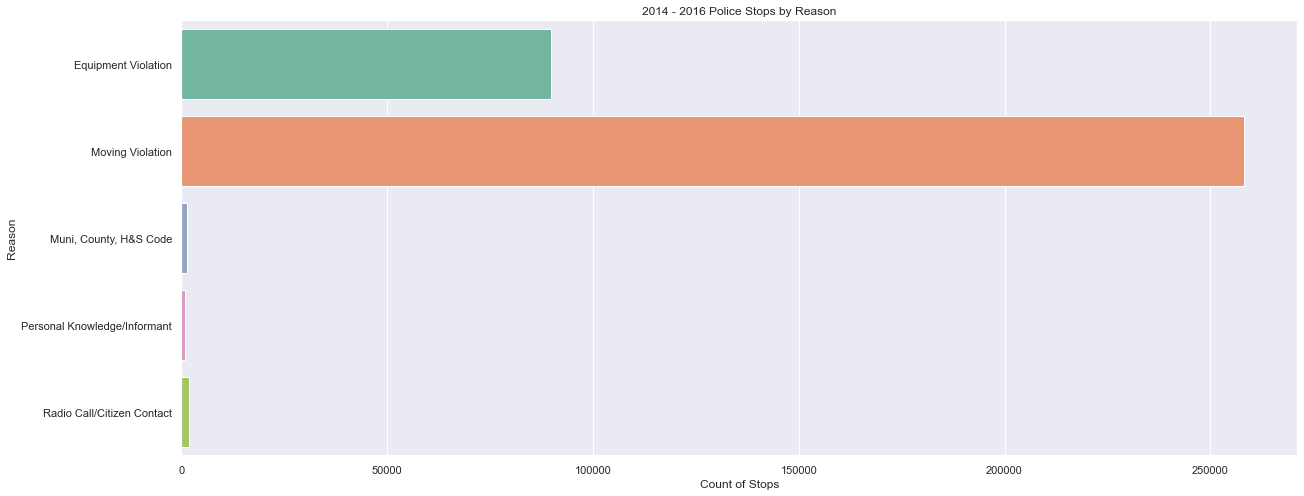

In [96]:
order = sdpolice_sorted_sr2.Reason.value_counts().iloc[:5].index
sorted_order = order.sort_values()
sns.barplot(data=sdpolice_sorted_sr2, 
            x='Count of Stops', 
            y='Reason', 
            order=sorted_order,
            ci=None).set(title="2014 - 2016 Police Stops by Reason")
plt.show()

Seaborn was used to plot 'sdpolice_sorted_sr2'. As entries varied greatly by officer, the top 5 reasons were chosen via .iloc() to slice the DataFrame.

The figure demonstrates overall "Count of Stops" on the x axis across 2014-2016, across the top 5 "Reason" listed. 'Moving Violations' was the biggest reason why San Diego police stopped drivers during this time period. The second reason was 'Equipment Violation', such as broken lights. Other reasons aside from these two were negligible.

#### ii) 2014-2016 Police Stops by Date

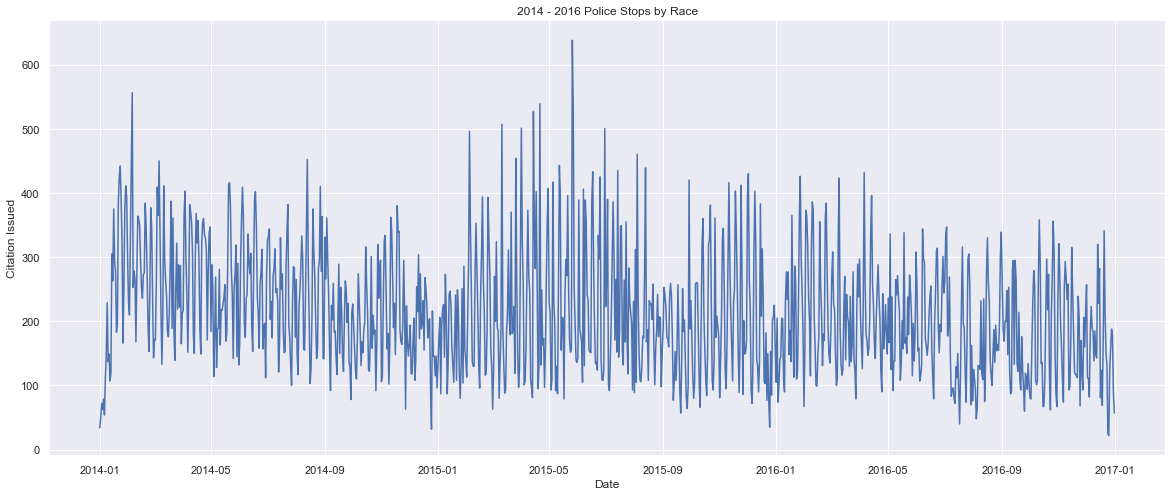

In [21]:
sns.set_palette("Set2")
sns.set(rc = {'figure.figsize':(20,8)})
sns.lineplot(data=sdpolice_sorted_temp, 
            x='Date', 
            y='Citation Issued', 
            ci=None).set(title="2014 - 2016 Police Stops by Race")
plt.show()

Above is a line plot of whether or not "Citation"s were issued across "Date"s. It is important to note that this graph shows **daily citations** whereas the following graphs demonstrate **citation rate**. While there was a clearly decent chance of being issued a citation if pulled over (>0.5), it was difficult to see if there was a pattern throughout the year.
As such, each year was plotted separately as follows.

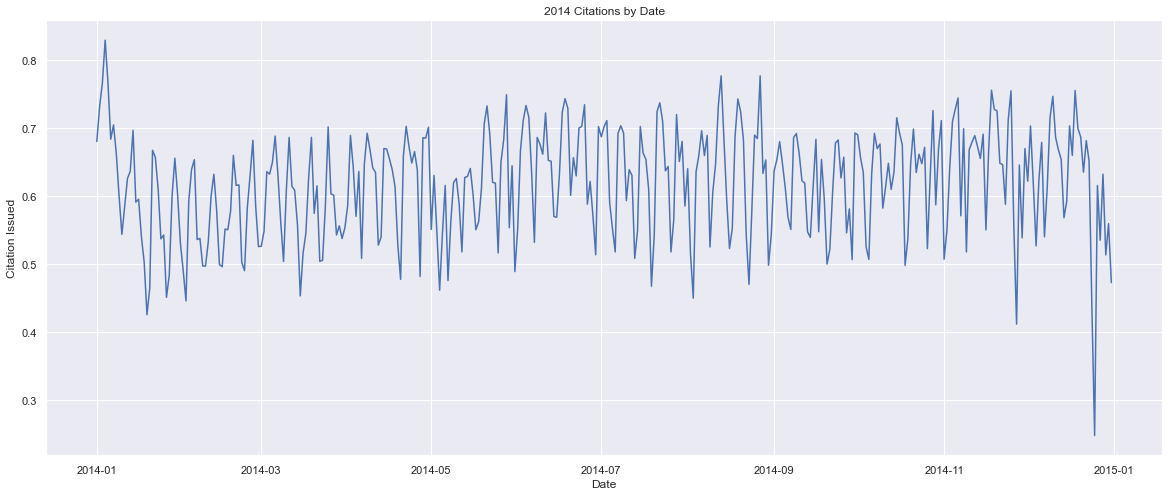

In [22]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.lineplot(data=sdpolice_2014_ct, 
            x='Date', 
            y='Citation Issued', 
            ci=None).set(title="2014 Citations by Date")
plt.show()

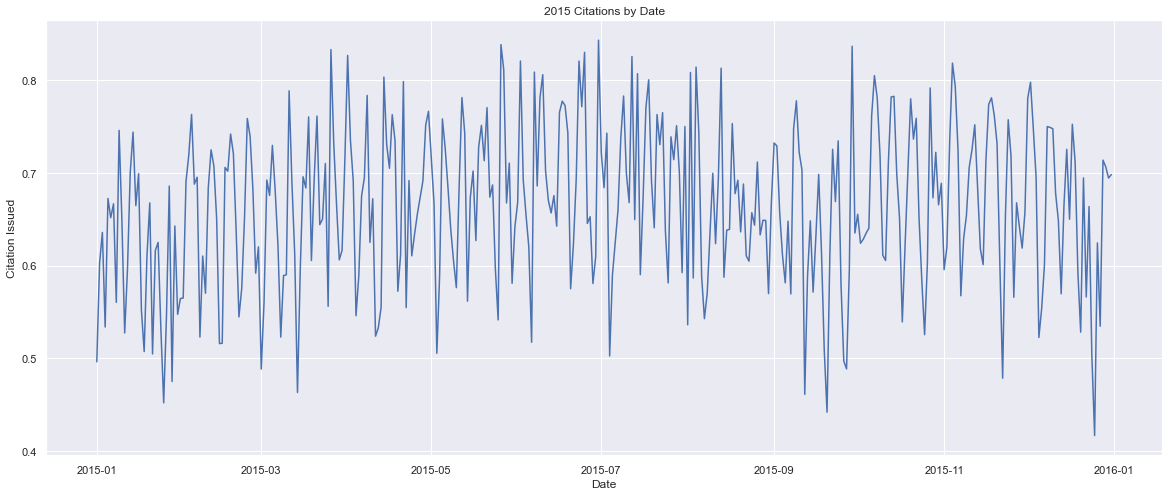

In [23]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.lineplot(data=sdpolice_2015_ct, 
            x='Date', 
            y='Citation Issued', 
            ci=None).set(title="2015 Citations by Date")
plt.show()

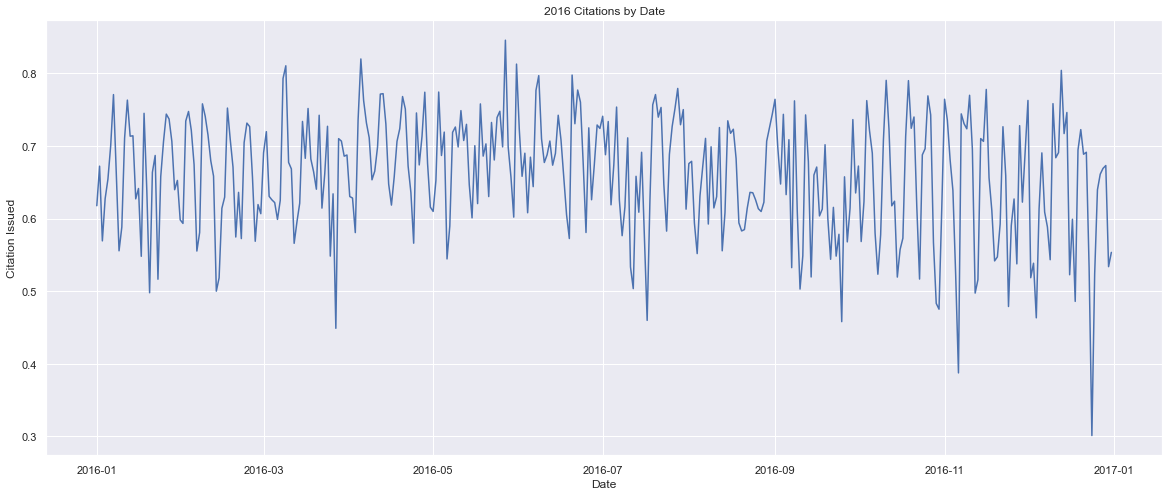

In [24]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.lineplot(data=sdpolice_2016_ct, 
            x='Date', 
            y='Citation Issued', 
            ci=None).set(title="2016 Citations by Date")
plt.show()

**By examing each graph by year, it seems that officers were less likely to give citations around Christmas. Otherwise, it was safe to say that if a driver was stopped, it was more than likely that they would be issued a citation in San Diego.**

***Note that in these annual graphs, citations are plotted as citation rates. If 100% of stopped drivers were issued citations, then it would be 1.0. If 0% of stopped drivers were issued citations, then it would 0.***

#### iii) 2014-2016 Police Stops by Gender

Data was visualized for police stops by gender across the range of the dataset (2014 - 2016). 

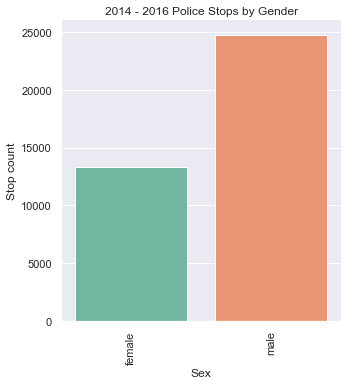

In [28]:
sns.set_palette("Set2")
sns.catplot(data=sdpolice_sorted_vc, 
            kind='bar', 
            x='Sex', 
            y='Stop count', 
            ci=None).set(title="2014 - 2016 Police Stops by Gender")
plt.xticks(rotation=90)
plt.show()

The figure above is a bar graph that plots "Sex" on the x-axis versus "Stop count" on the y-axis across 2014-2016. **This visually demonstrated that males (247693) were pulled over almost twice as much as females (133576) during this time period.**

The dataset values were also printed below:

In [43]:
sdpolice_gender_group = sdpolice_sorted_vc.groupby('Sex').sum()
print(sdpolice_gender_group['Stop count'])

Sex
female    133576
male      247693
Name: Stop count, dtype: int64


#### iv) 2014-2016 Police Stops by Race

Finally, in order to answer question iv) If a particular race get stopped more than others, police stops by race for the range of the dataset (2014 - 2016) were plotted. The following figure is a bar graph, with "Race" on the x-axis, and "Stop Count" on the y-axis. 

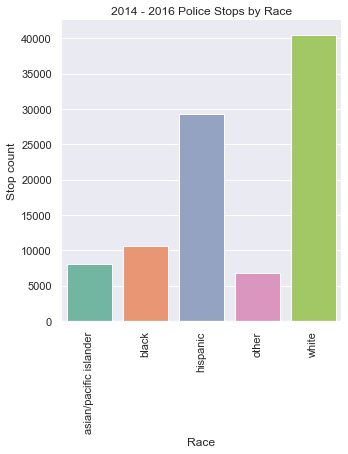

In [25]:
sns.set_palette("Set2")
sns.catplot(data=sdpolice_sorted_vc, 
            kind='bar', 
            x='Race', 
            y='Stop count', 
            ci=None).set(title="2014 - 2016 Police Stops by Race")
plt.xticks(rotation=90)
plt.show()

The dataset for the above plot is as follows:

In [26]:
print(sdpolice_sorted_vc)

                      Race     Sex  Citation Issued  Stop count
0   asian/pacific islander  female             True        8016
1   asian/pacific islander  female            False        4313
2   asian/pacific islander    male             True       11782
3   asian/pacific islander    male            False        8359
4                    black  female             True        7606
5                    black  female            False        5039
6                    black    male             True       15674
7                    black    male            False       14331
8                 hispanic  female             True       27565
9                 hispanic  female            False       10492
10                hispanic    male             True       52300
11                hispanic    male            False       26640
12                   other  female             True        6481
13                   other  female            False        2050
14                   other    male      

Across the years 2014-2016, Whites were most often to be stopped by the police, followed by Hispanics, then Blacks, then Asians/Pacific Islanders. Note that these values may be correlated with the inherent proportions of the population; it could be that San Diego inherently had a larger White population/proportion during these years, followed by Hispanics, and so on. Further analysis could compare these results versus the standard distribution of race throughout San Diego.

## 5) Conclusion

The SOPP dataset, while limited at its current stage was a telling source of police activity. From the years of 2014-2016, police data was fairly consistent, with citation rates hovering roughly between 50 - 80%. With that said, there was as a notable dip in citation rate down as low as 20% around Christmas-time, whether it be through leniency on the officer's behalf, staff shortages, fewer drivers on the road, or other reasons. 

There also was a notable gender bias in individuals who were stopped, as men were stopped almost twice as often as females. With the current dataset, however, it is difficult to determine causality.

Moreover, at least in San Diego, there were significant differences across race. White drivers were more likely to be stopped, followed by hispanics, then Black drivers, and lastly Asians. It could be that San Diego's demographic has a larger Caucasian population, hence the higher stop rate, but this is again difficult to say without more information. 

With that said, moving violations were the number one reason why drivers were stopped throughout the specified years, followed by equipment failure. In short, while there could be many reasons why officers pull drivers over, the data suggests that the best way to avoid police interaction in San Diego would be to obey traffic laws and to take care of your vehicle.  

### Special Thanks

The author would like to thank his partner, Emily Wu, as well as Drs. Michael Gorman and Elizabeth Harrison, whose support, friendship and mentorship throughout the years have laid the foundation and inspiration for this analysis.

Thanks also extend to Stanford for providing an open access database and helping bring these insights to life.